## **EXPLORATORY DATA ANALYSIS (EDA)**

## ***Import Libraries***

In [90]:
import os 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, normalize
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sea

## ***Load and Read Data***

In [9]:
cc_df = pd.read_csv('/Users/sahujyot/Amazon WorkDocs Drive/My Documents/Personal/Master/DSC 680/Project 01/CC_FRAUD.csv')
cc_df

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,LEGIT
1,NEKSXUK.NET,KK,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,LEGIT
2,XOSOP.COM,UO,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,LEGIT
3,TMA.COM,KR,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,LEGIT
4,VUHZRNB.COM,PO,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,LEGIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94677,XOSOP.COM,MO,685,11,11,0,0,0,1,1,0,1,3,0,8.112,15,1,49.95,49.95,LEGIT
94678,RONHGNCN.COM,KR,108,16,16,0,0,1,0,0,1,1,4,0,11.248,10,4,12.95,12.95,LEGIT
94679,XOSOP.COM,VO,601,18,18,0,0,1,1,1,0,1,2,0,27.824,23,0,38.85,38.85,LEGIT
94680,VUHZRNB.COM,LO,398,23,23,0,0,0,0,0,0,1,3,0,31.904,20,0,12.95,12.95,LEGIT


## ***Meta Data***

In [11]:
cc_df.head(50)

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,LEGIT
1,NEKSXUK.NET,KK,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,LEGIT
2,XOSOP.COM,UO,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,LEGIT
3,TMA.COM,KR,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,LEGIT
4,VUHZRNB.COM,PO,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,LEGIT
5,CIWEVXGWRG.ORG,ROI,386,11,11,0,0,0,1,1,0,1,3,1,-10.096,27,0,49.95,49.95,LEGIT
6,KZOGEIFBAVSI.NET,LM,127,20,20,0,0,1,0,0,0,2,3,1,15.656,9,9,12.95,12.95,LEGIT
7,TMA.COM,AR,649,12,12,0,0,1,1,1,0,1,2,0,-38.320,16,0,10.36,10.36,LEGIT
8,VUHZRNB.COM,BO,308,13,13,0,0,0,1,1,0,2,3,0,33.328,10,0,38.85,38.85,LEGIT
9,EAYROLLTBU.COM,PO,614,6,6,0,0,1,0,0,0,1,2,0,-43.496,8,0,10.36,10.36,LEGIT


In [16]:
# Check the columns of creditcard data with number of rows
print(cc_df.columns)
print( 'numbe of rows',len(cc_df))

Index(['DOMAIN', 'STATE', 'ZIPCODE', 'TIME1', 'TIME2', 'VIS1', 'VIS2', 'XRN1',
       'XRN2', 'XRN3', 'XRN4', 'XRN5', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5',
       'TRN_AMT', 'TOTAL_TRN_AMT', 'TRN_TYPE'],
      dtype='object')
numbe of rows 94682


In [17]:
# NUll Value check
cc_df.isnull().sum()

DOMAIN           0
STATE            0
ZIPCODE          0
TIME1            0
TIME2            0
VIS1             0
VIS2             0
XRN1             0
XRN2             0
XRN3             0
XRN4             0
XRN5             0
VAR1             0
VAR2             0
VAR3             0
VAR4             0
VAR5             0
TRN_AMT          0
TOTAL_TRN_AMT    0
TRN_TYPE         0
dtype: int64

In [18]:
# checking  data types
print(cc_df.dtypes)

DOMAIN            object
STATE             object
ZIPCODE            int64
TIME1              int64
TIME2              int64
VIS1               int64
VIS2               int64
XRN1               int64
XRN2               int64
XRN3               int64
XRN4               int64
XRN5               int64
VAR1               int64
VAR2               int64
VAR3             float64
VAR4               int64
VAR5               int64
TRN_AMT          float64
TOTAL_TRN_AMT    float64
TRN_TYPE          object
dtype: object


In [19]:
# Duplicated data check
cc_df.duplicated().sum()

5068

In [20]:
# Dropping the duplicate data
cc_df.drop_duplicates(inplace=True)

In [22]:
# summary statistics of the data
cc_df.describe()

,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT
count,89614.000000,89614.000000,89614.000000,89614.000000,89614.000000,89614.000000,89614.000000,89614.000000,89614.000000,89614.000000,89614.000000,89614.00000,89614.000000,89614.000000,89614.000000,89614.000000,89614.000000
mean,449.430480,13.897750,13.909523,0.113833,0.018011,0.533354,0.541578,0.399234,0.018881,5.870980,2.412882,0.42875,5.504907,14.059109,1.361606,26.321858,26.312498
std,230.146675,5.265048,5.259802,0.317610,0.132990,0.498889,0.498271,0.489744,0.136105,98.576128,1.005311,0.49490,31.503396,6.526042,2.409152,14.166492,14.175314
min,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-258.120000,6.000000,0.000000,0.000000,0.000000
25%,166.000000,11.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.00000,-12.950000,8.000000,0.000000,12.950000,12.950000
50%,600.000000,14.000000,14.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.00000,11.488000,12.000000,0.000000,25.900000,25.900000
75%,655.000000,18.000000,18.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.00000,28.776000,20.000000,2.000000,38.850000,38.850000
max,694.000000,23.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3278.000000,4.000000,1.00000,65.544000,46.000000,26.000000,95.400000,95.400000


- The count of the Total Transaction Amount for the whole dataset is 89614
- 25% of the Total Transaction Amount for the whole dataset is 12.95
- The standard deviation of the Total Transaction Amount for the whole dataset is 14.17

In [24]:
# checking how many email address in the data
cc_df['DOMAIN'].value_counts()

TMA.COM                 15633
XOSOP.COM               14931
VUHZRNB.COM             10888
TCN.COM                  3829
NEKSXUK.NET              3704
                        ...  
LRJXBYMTNEN.ORG             1
KFPTYPNNVGM.FASTMAIL        1
KFPJEAQAZZ.COM              1
OEOXHGDSZ.COM               1
FLVNZHPQCGKBSPE.NET         1
Name: DOMAIN, Length: 9809, dtype: int64

In [ ]:
# Save the results to the dataframe and Rename the index
DOMAIN_counts = creditcard_df['DOMAIN'].value_counts().to_frame()
DOMAIN_counts.rename(columns = {'DOMAIN': 'value_counts'}, inplace = True)
DOMAIN_counts.index.name = 'DOMAIN'
DOMAIN_counts

,value_counts
DOMAIN,
TMA.COM,15633
XOSOP.COM,14931
VUHZRNB.COM,10888
TCN.COM,3829
NEKSXUK.NET,3704
...,...
ADOGGHJHLBB.COM,1
EOXRIMRNKKKD.COM,1
ZFZNQFL.NET,1


In [26]:
# Number of  customer's location
cc_df['STATE'].value_counts()

KR      18599
MO       7867
VO       6382
ROK      5434
PO       4081
NAO      3449
CO       3358
AO       2948
LM       2570
LO       2481
BO       2286
SO       2226
ROM      2135
SK       2105
AR       1628
MV       1532
CR       1472
IO       1402
ROB      1350
EAO      1188
,O       1095
OO       1075
RONO     1034
ROT      1024
NO       1009
KO        925
TO        839
ROI       694
TAO       661
UO        587
KAO       549
NNO       530
K         515
ROA       512
BR        381
UBAO      380
YO        373
SP        368
TR        304
KK        303
AK        299
ROU       289
RO        276
JAO       216
ROD       209
AAO       204
YAO       128
MER        97
PK         88
CAO        83
SR         70
XV          3
DSA         1
Name: STATE, dtype: int64

In [27]:
# Count the variable of The type of transaction whether FRAUD or LEGIT
# Distribution of Legit transactions and Fraud transactions
cc_df['TRN_TYPE'].value_counts()

LEGIT    87562
FRAUD     2052
Name: TRN_TYPE, dtype: int64

In [28]:
# Save the results to the dataframe and Rename the index
TRN_TYPE_counts = cc_df['TRN_TYPE'].value_counts().to_frame()
TRN_TYPE_counts.rename(columns = {'TRN_TYPE': 'value_counts'}, inplace = True)
TRN_TYPE_counts.index.name = 'TRN_TYPE'
TRN_TYPE_counts

,value_counts
TRN_TYPE,
LEGIT,87562
FRAUD,2052


## ***Data Analysis***

In [29]:
# Let's filter or extract all FRAUD columns from TRN_TYPE and recall creditcard_df
# Here is the display of 2052 cards that are marked as fraudulent transactions
Fraud = cc_df[cc_df.TRN_TYPE == 'FRAUD']

In [30]:
Fraud

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
57,VUHZRNB.COM,JAO,679,19,19,0,0,0,0,0,0,1,3,0,45.376,19,3,12.95,12.95,FRAUD
141,TMA.COM,MV,369,14,14,0,0,1,1,1,0,1,2,1,40.400,9,0,11.01,11.01,FRAUD
186,XOSOP.COM,KR,122,19,19,0,0,0,0,0,0,1,4,1,50.648,21,4,0.00,0.00,FRAUD
283,BRZWCURTY.NET,KR,120,13,13,0,0,1,0,0,0,1,3,1,39.848,8,0,36.26,36.26,FRAUD
290,TMA.COM,BR,670,21,21,0,0,0,1,1,0,1,0,0,-9.624,24,0,12.95,12.95,FRAUD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94528,XZXDQOGHY.NET,AR,649,8,8,0,0,0,0,0,0,1,3,0,-23.080,23,0,44.85,44.85,FRAUD
94544,TMA.COM,UBAO,669,13,13,0,0,0,0,0,0,1,2,0,-13.856,22,0,12.95,12.95,FRAUD
94565,VUHZRNB.COM,AR,649,7,7,0,0,0,0,0,0,1,3,1,32.664,26,3,25.90,25.90,FRAUD
94606,XOSOP.COM,UBAO,669,20,20,0,0,0,0,0,0,1,2,1,12.120,22,0,38.85,38.85,FRAUD


In [31]:
Fraud.describe()

,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT
count,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000,2052.000000
mean,558.100877,13.808967,13.831871,0.117446,0.019006,0.544834,0.535088,0.386452,0.012671,4.047271,2.462476,0.431774,6.197973,14.073587,1.367446,24.972315,24.972315
std,198.411439,5.042149,5.028878,0.322030,0.136579,0.498107,0.498889,0.487055,0.111875,60.654782,0.967565,0.495444,31.190260,6.343103,2.354177,14.427088,14.427088
min,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-155.560000,6.000000,0.000000,0.000000,0.000000
25%,600.750000,11.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,-12.106000,9.000000,0.000000,12.950000,12.950000
50%,655.000000,14.000000,14.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,11.784000,12.000000,0.000000,12.950000,12.950000
75%,679.000000,18.000000,18.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,28.892000,19.000000,2.000000,38.850000,38.850000
max,694.000000,23.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1643.000000,4.000000,1.000000,61.960000,38.000000,12.000000,95.400000,95.400000


- The count of the Total Transaction Amount that is fraud is 2052
- The minimum of the Total Transaction Amount that is fraud is 0
- The standard deviation of the Total Transaction Amount that is fraud is 14.42

In [32]:
# Making all Legit data 
Legit = cc_df[cc_df.TRN_TYPE == 'LEGIT']

In [33]:
Legit

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,LEGIT
1,NEKSXUK.NET,KK,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,LEGIT
2,XOSOP.COM,UO,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,LEGIT
3,TMA.COM,KR,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,LEGIT
4,VUHZRNB.COM,PO,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,LEGIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94677,XOSOP.COM,MO,685,11,11,0,0,0,1,1,0,1,3,0,8.112,15,1,49.95,49.95,LEGIT
94678,RONHGNCN.COM,KR,108,16,16,0,0,1,0,0,1,1,4,0,11.248,10,4,12.95,12.95,LEGIT
94679,XOSOP.COM,VO,601,18,18,0,0,1,1,1,0,1,2,0,27.824,23,0,38.85,38.85,LEGIT
94680,VUHZRNB.COM,LO,398,23,23,0,0,0,0,0,0,1,3,0,31.904,20,0,12.95,12.95,LEGIT


In [34]:
# Let's calculate the percentage of the credit card FRAUD
fraud_percentage = round(2052/87562*100, 2)
fraud_percentage

2.34

In [35]:
# Statistical Measures of Legit Data
Legit.TOTAL_TRN_AMT.describe()

count    87562.000000
mean        26.343905
std         14.167924
min          0.000000
25%         12.950000
50%         25.900000
75%         38.850000
max         95.400000
Name: TOTAL_TRN_AMT, dtype: float64

In [36]:
# Statistical Measures of Fraud Data
Fraud.TOTAL_TRN_AMT.describe()

count    2052.000000
mean       24.972315
std        14.427088
min         0.000000
25%        12.950000
50%        12.950000
75%        38.850000
max        95.400000
Name: TOTAL_TRN_AMT, dtype: float64

In [37]:
# Comparing the values for both Transactions
cc_df.groupby('TRN_TYPE').mean()

,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT
TRN_TYPE,,,,,,,,,,,,,,,,,
FRAUD,558.100877,13.808967,13.831871,0.117446,0.019006,0.544834,0.535088,0.386452,0.012671,4.047271,2.462476,0.431774,6.197973,14.073587,1.367446,24.972315,24.972315
LEGIT,446.883808,13.899831,13.911343,0.113748,0.017987,0.533085,0.541730,0.399534,0.019027,5.913718,2.411720,0.428679,5.488665,14.058770,1.361470,26.353484,26.343905


Here is the mean values of the whole Credit Card dataset grouped into two categories: Fraud Transactions and Normal (Legit) Transactions.

In [38]:
# Let's drop 'DOMAIN' columns from creditcard_df
cc_df.drop("DOMAIN", axis = 1, inplace= True)

In [39]:
# Let's drop 'STATE' columns from creditcard_df
cc_df.drop("STATE", axis = 1, inplace= True)

In [40]:
cc_df.head()

,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,LEGIT
1,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,LEGIT
2,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,LEGIT
3,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,LEGIT
4,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,LEGIT


In [41]:
cc_df.columns

Index(['ZIPCODE', 'TIME1', 'TIME2', 'VIS1', 'VIS2', 'XRN1', 'XRN2', 'XRN3',
       'XRN4', 'XRN5', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'TRN_AMT',
       'TOTAL_TRN_AMT', 'TRN_TYPE'],
      dtype='object')

In [42]:
n = len(cc_df.columns) - 1
n

17

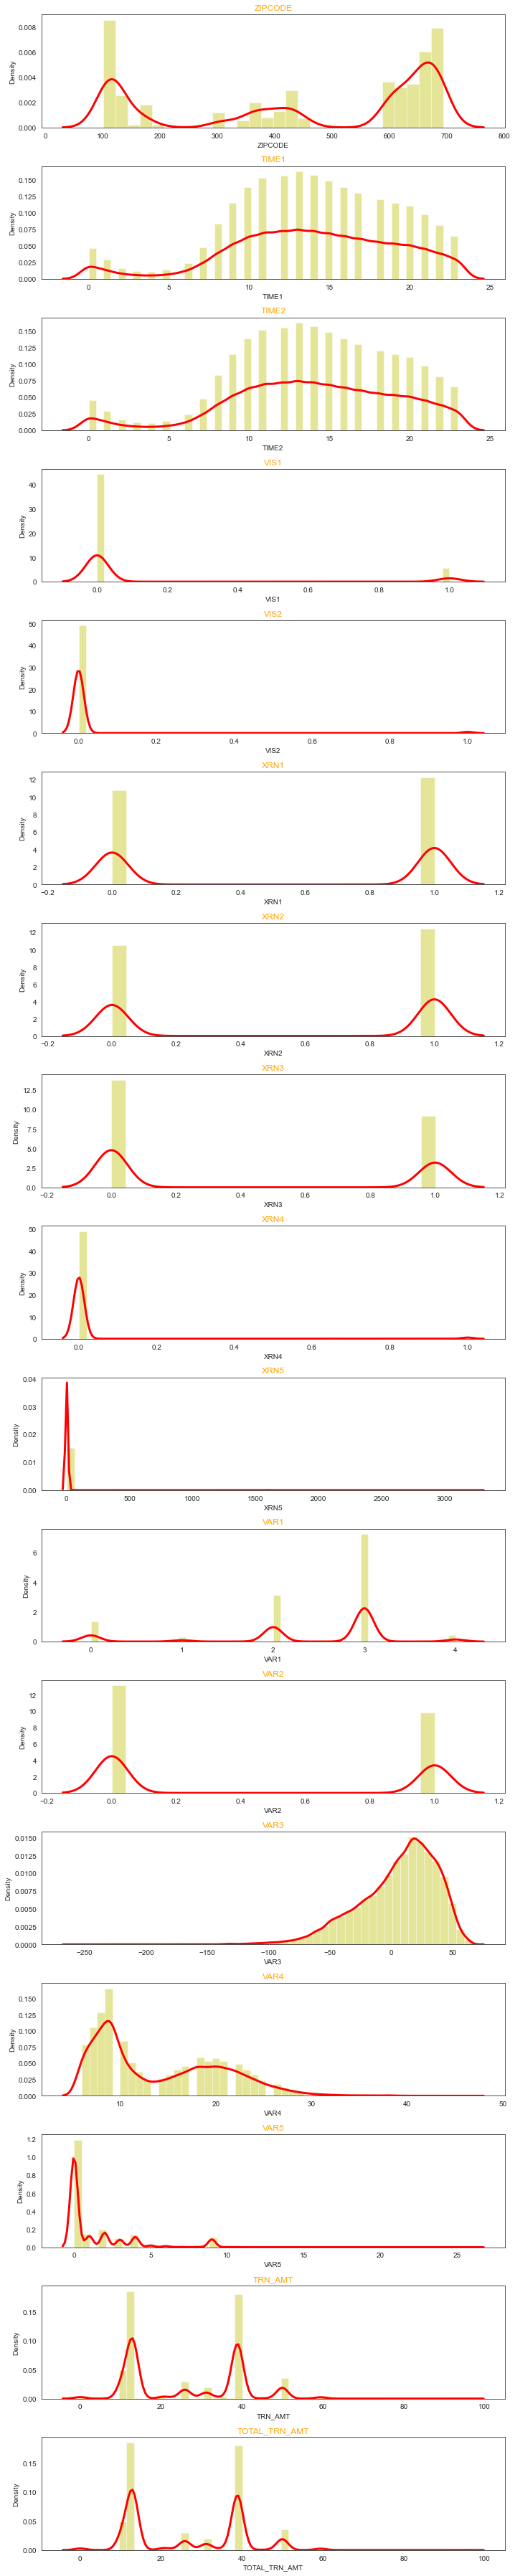

In [47]:
# Distribution plot using kernal Density plot 
sns.set_style('white')
plt.figure(figsize=(10,50))
for i in range(len(cc_df.columns)-1):
  plt.subplot(17, 1, i+1)
  sns.distplot(cc_df[cc_df.columns[i]], kde_kws={"color": "r", "lw": 3, "label": "KDE"}, hist_kws={"color": "y"})
  plt.title(cc_df.columns[i], color = 'Orange')

plt.tight_layout()

Here is the distribution of the features variables

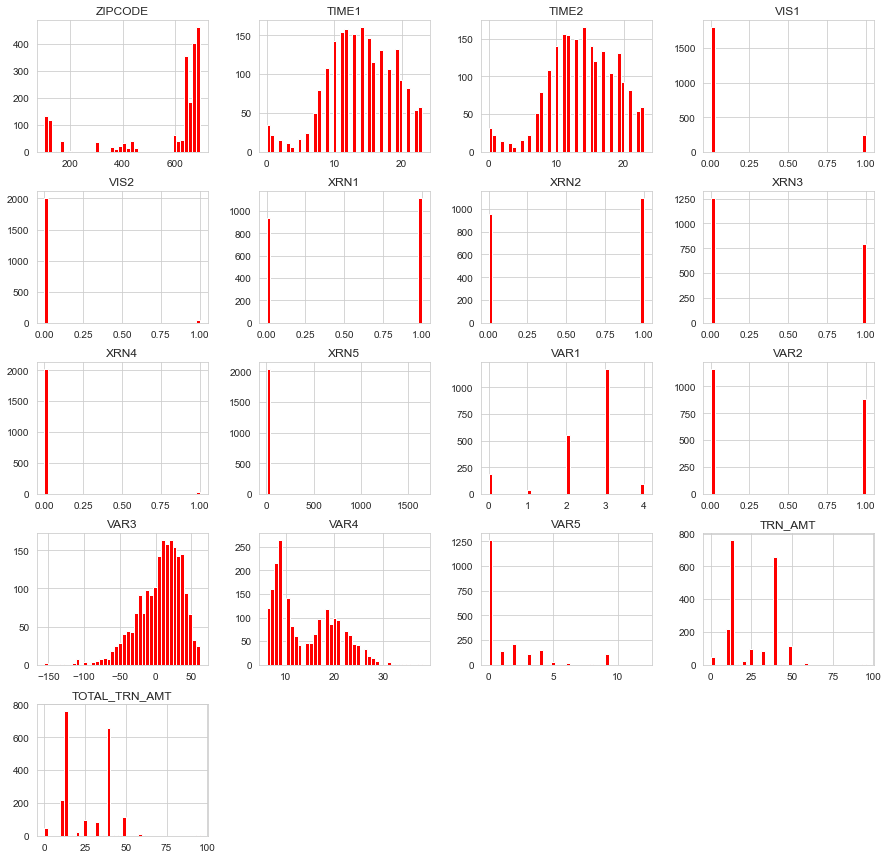

In [60]:
# Histogram of credit card that are FRAUD
sns.set_style('whitegrid')

Fraud.hist(figsize=(15, 15), bins = 40, color = 'red');

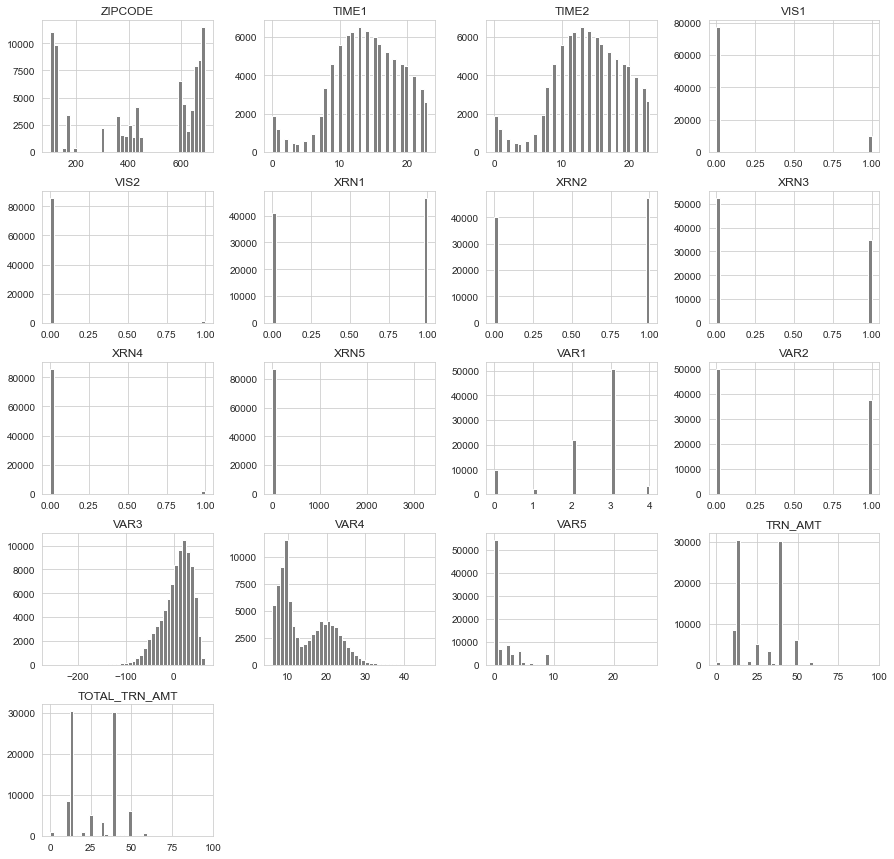

In [51]:
# Histogram of credit card that are LEGIT
sns.set_style('whitegrid')

Legit.hist(figsize=(15, 15), bins = 40, color = 'Gray');

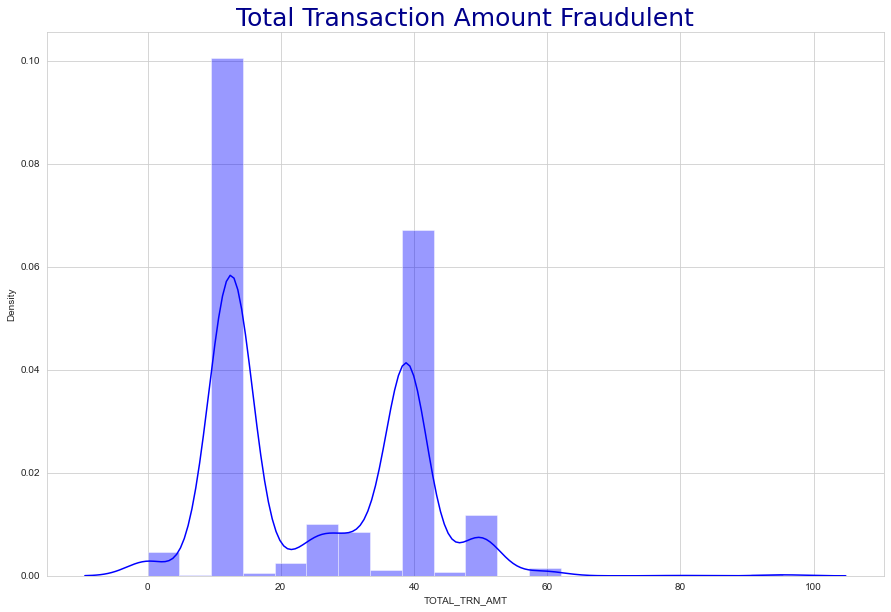

In [52]:
# Distribution of credit card that is'Total Transaction Amount' FRAUD
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
sns.distplot(Fraud['TOTAL_TRN_AMT'], color = 'Blue', bins = 20)

plt.title('Total Transaction Amount Fraudulent', fontsize = 25, color = 'DarkBlue', fontname = 'DejaVu Sans')

plt.show()

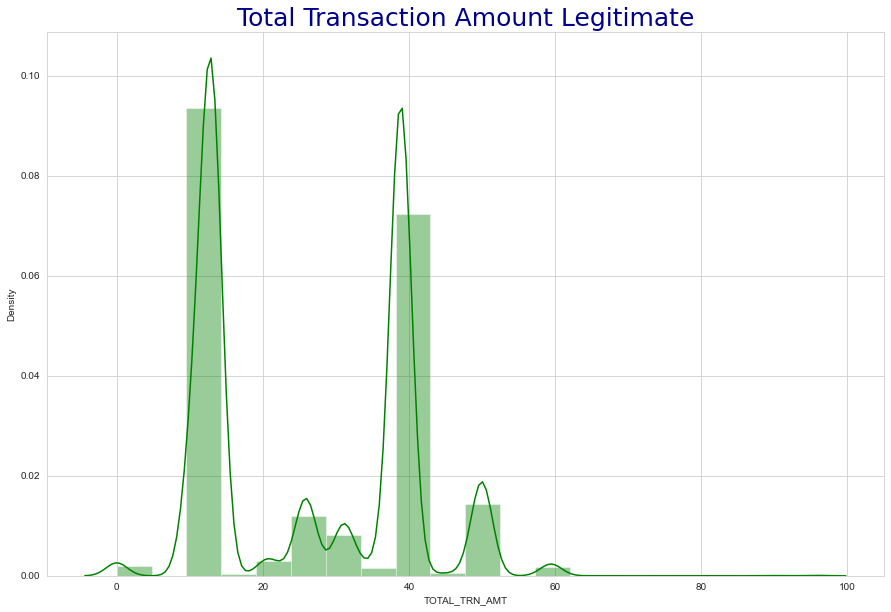

In [53]:
# Distribution of credit card that is'Total Transaction Amount' LEGIT
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
sns.distplot(Legit['TOTAL_TRN_AMT'], color = 'Green', bins = 20)

plt.title('Total Transaction Amount Legitimate', fontsize = 25, color = 'DarkBlue', fontname = 'DejaVu Sans')
plt.show()

Here is the Distribution of the Total Transactions Amounts that are LEGITIMATE

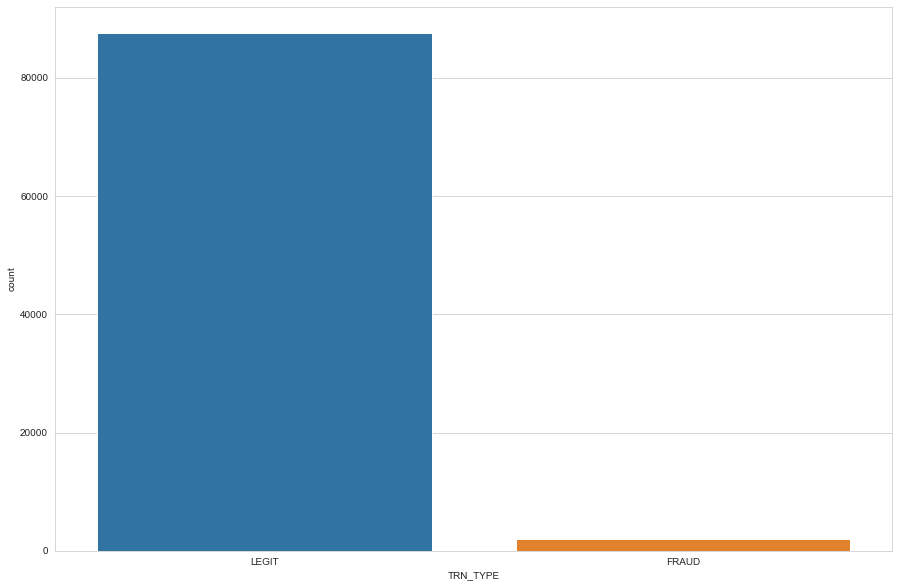

In [55]:
# Let's print out countplot to know how many Credit Card data belong to FRAUD and LEGIT
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
sns.countplot(cc_df['TRN_TYPE'], label = "Count");

Here is the summary of the parts of the data that are Fraudulent and Legitimate:

- 87562 of the credit card data are Legitimate
- 2052 of the credit card data are Fraudulent
- 2.34% is the percentage of the fraud transactions

In [56]:
correlations = cc_df.corr()

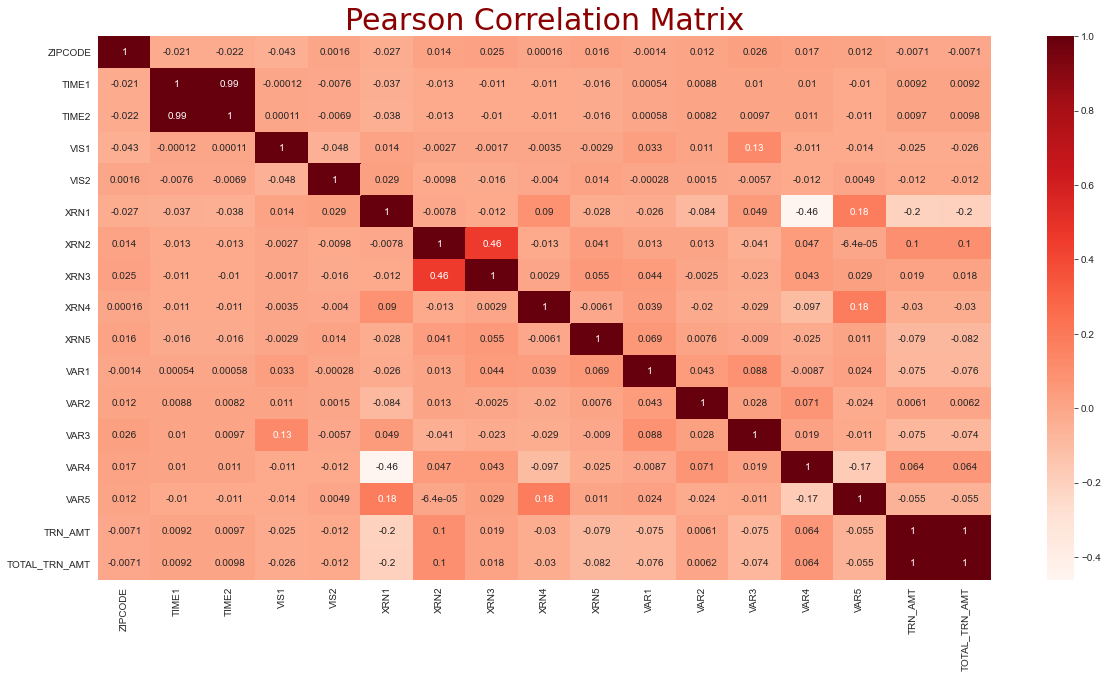

In [63]:
# Correlation Matrix between the credit card
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(correlations, cmap ='Reds', annot = True)
plt.title('Pearson Correlation Matrix', fontsize = 30, color = 'Darkred', fontname = 'DejaVu Sans')
plt.show();

- TIME1 and TIME2 have a strong correlation of 0.99, which is close to 1, indicating a significant positive link.
- The correlation between XRN2 and XRN3 is 0.46, which is quite close to 1, indicating a favorable link.
- The correlation between XRN1 and VAR4 is -0.46, which is close to zero and indicates that there is no association.

## Model Development

In [ ]:
#Since there are 2052 fraud transaction I have taken 2052 legit sample to make my test and train data

In [65]:
Legit_sample = Legit.sample(n=2052)

In [66]:
cc_new = pd.concat([Legit_sample, Fraud], axis = 0)

In [67]:
cc_new.head()

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
80918,WE.COM,VO,601,23,23,1,0,0,0,0,0,1,2,0,33.632,14,0,38.85,38.85,LEGIT
53471,BWFGHIJ.NET,KR,123,23,23,0,0,1,1,1,0,1,3,0,19.720,8,0,33.03,33.03,LEGIT
4985,TMA.COM,KR,103,18,18,0,0,1,1,0,0,1,3,0,-31.136,6,1,25.90,25.90,LEGIT
55599,TMA.COM,AO,675,18,18,0,0,1,0,0,0,1,0,0,-25.584,9,9,12.95,12.95,LEGIT
73564,HPQF.COM,VO,600,21,21,0,0,1,1,1,0,1,3,1,-16.304,14,2,38.85,38.85,LEGIT


In [68]:
cc_new.groupby('TRN_TYPE').mean()

,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT
TRN_TYPE,,,,,,,,,,,,,,,,,
FRAUD,558.100877,13.808967,13.831871,0.117446,0.019006,0.544834,0.535088,0.386452,0.012671,4.047271,2.462476,0.431774,6.197973,14.073587,1.367446,24.972315,24.972315
LEGIT,446.806043,13.958577,13.952242,0.111111,0.019981,0.538499,0.555556,0.404971,0.019493,7.179825,2.421540,0.421053,5.691910,14.243177,1.306043,26.039581,26.033270


In [69]:
# Splitting the data into Features and Targets
x= cc_new.drop(columns = 'TRN_TYPE', axis=1)
y = cc_new['TRN_TYPE']

In [70]:
print(x)

              DOMAIN STATE  ZIPCODE  TIME1  TIME2  VIS1  VIS2  XRN1  XRN2  \
80918         WE.COM    VO      601     23     23     1     0     0     0   
53471    BWFGHIJ.NET    KR      123     23     23     0     0     1     1   
4985         TMA.COM    KR      103     18     18     0     0     1     1   
55599        TMA.COM    AO      675     18     18     0     0     1     0   
73564       HPQF.COM    VO      600     21     21     0     0     1     1   
...              ...   ...      ...    ...    ...   ...   ...   ...   ...   
94528  XZXDQOGHY.NET    AR      649      8      8     0     0     0     0   
94544        TMA.COM  UBAO      669     13     13     0     0     0     0   
94565    VUHZRNB.COM    AR      649      7      7     0     0     0     0   
94606      XOSOP.COM  UBAO      669     20     20     0     0     0     0   
94659        TCN.COM    MO      685     14     14     0     0     1     1   

       XRN3  XRN4  XRN5  VAR1  VAR2    VAR3  VAR4  VAR5  TRN_AMT  \
80918  

In [71]:
##dropping domain and state columns as these are not useful

x.drop("DOMAIN", axis = 1, inplace= True)
x.drop("STATE", axis = 1, inplace= True)


In [72]:
print(x)

       ZIPCODE  TIME1  TIME2  VIS1  VIS2  XRN1  XRN2  XRN3  XRN4  XRN5  VAR1  \
80918      601     23     23     1     0     0     0     0     0     1     2   
53471      123     23     23     0     0     1     1     1     0     1     3   
4985       103     18     18     0     0     1     1     0     0     1     3   
55599      675     18     18     0     0     1     0     0     0     1     0   
73564      600     21     21     0     0     1     1     1     0     1     3   
...        ...    ...    ...   ...   ...   ...   ...   ...   ...   ...   ...   
94528      649      8      8     0     0     0     0     0     0     1     3   
94544      669     13     13     0     0     0     0     0     0     1     2   
94565      649      7      7     0     0     0     0     0     0     1     3   
94606      669     20     20     0     0     0     0     0     0     1     2   
94659      685     14     14     0     0     1     1     0     0     1     3   

       VAR2    VAR3  VAR4  VAR5  TRN_AM

In [73]:
# Let us split train and test data 80:20 ration
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 2)

In [87]:
# Decision Tree Model Building

dtc_model = DecisionTreeClassifier(criterion= 'gini', min_samples_split=8,
                                  min_samples_leaf = 4, max_features = 'auto')
# fit the model
dtc_model.fit(x_train, y_train)

#Predict Model
predict_dtc = dtc_model.predict(x_test)

# Accuracy
acc_dtc = accuracy_score(y_test, predict_dtc)

In [88]:
print("DTC",classification_report(y_test, predict_dtc))

DTC               precision    recall  f1-score   support

       FRAUD       0.58      0.67      0.62       411
       LEGIT       0.61      0.51      0.56       410

    accuracy                           0.59       821
   macro avg       0.59      0.59      0.59       821
weighted avg       0.59      0.59      0.59       821



In [95]:
# Confusion matrix
DTC_matrix = confusion_matrix(y_test, predict_dtc,)
DTC_matrix

array([[275, 136],
       [199, 211]])

Text(34.0, 0.5, 'Actual Labels')

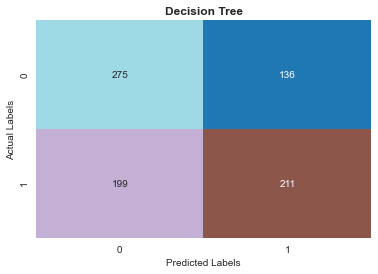

In [107]:
fig, ax = plt.subplots()
sea.heatmap(DTC_matrix,annot=True, fmt="d" ,cbar=False, cmap="tab20")
ax.set_title("Decision Tree", weight='bold')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')

In [82]:
# Confusion Matrix to determine false/true postive and Negative
confusion_matrix(y_test, dt.predict(x_test), labels = ['LEGIT', 'FRAUD'])

array([[305, 105],
       [147, 264]])

In this instance, the first row stands for positive, while the second row for negative. I therefore have 275 real positives and 136 erroneous positives. Accordingly, out of 411, I have 275 transactions that are successfully classed as normal, and  136 transactions that were fraudulently classified as normal.